# Assignment 1 (09.19)

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Machine Learning]

- 제출은 `이름(학번).ipynb` 파일과 `이름(학번).html`파일 2개를 제출할 것. 
- ipynb 혹은 html 파일을 이용한 제출이 익숙하지 않은 학생은 질문할 것. 

In [1]:
from fastai.vision.all import * 
from fastai.collab import * 
from fastai.text.all import *

## `1`. 이미지자료분석 

아래를 이용하여 MNIST_SAMPLE 이미지 자료를 다운로드 받고 dls오브젝트를 만들어라. 

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
dls = ImageDataLoaders.from_folder(path) 

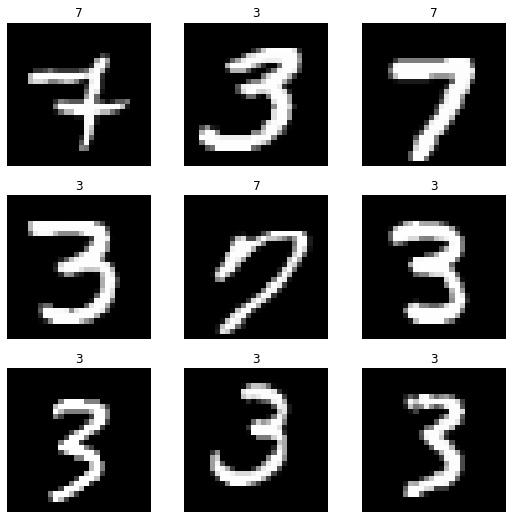

In [4]:
dls.show_batch()

`(1)` cnn_learner를 이용하여 lrnr 오브젝트를 생성하라. 
- arch 는 resnet34 로 설정할 것 
- metrics 는 error_rate 로 설정할 것 

In [5]:
lrnr = cnn_learner(dls,resnet34,metrics=error_rate)

`(2)` fine_tune 을 이용하여 lrnr 오브젝트를 학습하라. 

In [6]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.266744,0.154645,0.057409,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.049155,0.026522,0.005888,00:09


`(3)` 아래를 이용하여 X,y를 만들어라. 

```python
X,y = dls.one_batch()
```

X,y의 shape을 조사하라. X에는 몇개의 이미지가 있는가? 이미지의 size는 얼마인가? 

In [7]:
X,y = dls.one_batch()

In [8]:
X.shape

torch.Size([64, 3, 28, 28])

**Answer**
- X에는 64개의 이미지가 들어있다.
- image size는 28 $\times$ 28 이다.

In [9]:
y.shape

torch.Size([64])

`(4)` 아래의 코드를 이용하여 X의 두번째 이미지가 어떠한 숫자를 의미하는지 확인하라. (그림보고 3인지 7인지 확인하여 답을 쓸 것)
```python
show_image(X[0])
```

그리고 show_image가 정의된 파일의 경로를 확인하고 show_image가 python 내장함수 인지, torch에서 지원하는 함수인지 fastai에서 지원하는 함수인지 파악하라. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

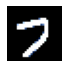

In [10]:
show_image(X[1])

**Answer**
- X의 2번째 이미지는 7이다.

In [11]:
?X

Type:            TensorImage
String form:    
TensorImage([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179,  <...>          [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044]]]],
           device='cuda:0')
Length:          64
File:            ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/torch_core.py
Docstring:       <no docstring>
Class docstring: A `Tensor` which support subclass pickling, and maintains metadata when casting or after methods


**Answer**
- fastai에서 지원하는 함수임을 확인하였다.

`(5)` lrnr 오브젝트를 이용하여 AI가 X[0]을 어떤 값으로 판단하는지 확인하라. 올바르게 판단하였는가? 올바르게 판단했다면 몇 프로의 확신으로 판단하였는가?

In [12]:
lrnr.model(X[0:1])

TensorBase([[-5.3843,  5.4968]], device='cuda:0', grad_fn=<AliasBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

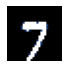

In [13]:
show_image(X[0])

**Answer**
- 왼쪽이 크면 3으로 판단?

In [14]:
lrnr.model(X[1:2])

TensorBase([[-3.1113,  2.9327]], device='cuda:0', grad_fn=<AliasBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

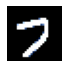

In [15]:
show_image(X[1])

3이 0, 7이 1

**Answer**
- 몉 %의 확신...

## `2`. 추천시스템

아래를 이용하여 rcmd_anal.csv 를 다운로드 받고 dls오브젝트를 만들어라.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')

In [17]:
df

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4
...,...,...,...,...
995,100,18,4.104276,홍차8
996,100,17,4.164773,홍차7
997,100,14,4.026915,홍차4
998,100,4,0.838720,커피4


`(2)` dls와 lrnr 오브젝트를 생성하고 lrnr 오브젝트를 학습하라. 

In [ ]:
dls = CollabDataLoaders.from_df(df)

In [ ]:
dls.show_batch()

,user,item,rating
0,96,6,1.285778
1,49,8,3.763614
2,27,7,3.893725
3,67,19,3.843778
4,50,13,1.148465
5,11,4,3.938157
6,42,20,1.292435
7,82,5,0.916553
8,36,1,4.137721
9,57,16,4.069549


In [ ]:
X,y = dls.one_batch()

In [ ]:
lrnr = collab_learner(dls,y_range = (0,5))

In [ ]:
lrnr.fit(30)

epoch,train_loss,valid_loss,time
0,2.320941,2.324705,00:00
1,2.314797,2.322202,00:00
2,2.304035,2.304165,00:00
3,2.282305,2.254308,00:00
4,2.245986,2.159335,00:00
5,2.185294,2.012167,00:00
6,2.092429,1.816218,00:00
7,1.970966,1.581562,00:00
8,1.823084,1.325473,00:00
9,1.652672,1.069254,00:00


`(1)` 73번 유저가 먹은 아이템 및 평점을 출력하는 코드를 작성하라. 이를 기반으로 73번 유저가 어떠한 취향인지 파악하라. 

In [ ]:
lrnr.model(X.to("cuda:0"))

tensor([0.9855, 4.0321, 1.0405, 1.0612, 4.1033, 3.9851, 0.9788, 0.9517, 0.9547,
        1.0172, 4.0755, 1.0367, 0.9674, 3.9807, 1.0733, 0.9906, 3.9274, 4.0603,
        0.9905, 3.9601, 1.0285, 0.8986, 4.1014, 4.0409, 0.9821, 3.9432, 3.8689,
        3.9666, 3.9385, 3.9335, 4.0350, 4.1181, 4.0165, 4.0374, 4.0379, 1.0354,
        0.9240, 0.9333, 0.9354, 0.9310, 4.0022, 4.0325, 1.1484, 4.0243, 4.0091,
        3.8682, 4.0180, 0.9321, 0.9291, 1.1728, 4.1206, 0.9976, 4.0275, 1.1463,
        3.8876, 3.9805, 1.0495, 1.0352, 3.8943, 3.9146, 0.9915, 4.0992, 1.0217,
        1.0631], device='cuda:0', grad_fn=<AddBackward0>)

In [24]:
lrnr.model(X.to("cuda:0"))

tensor([0.9855, 4.0321, 1.0405, 1.0612, 4.1033, 3.9851, 0.9788, 0.9517, 0.9547,
        1.0172, 4.0755, 1.0367, 0.9674, 3.9807, 1.0733, 0.9906, 3.9274, 4.0603,
        0.9905, 3.9601, 1.0285, 0.8986, 4.1014, 4.0409, 0.9821, 3.9432, 3.8689,
        3.9666, 3.9385, 3.9335, 4.0350, 4.1181, 4.0165, 4.0374, 4.0379, 1.0354,
        0.9240, 0.9333, 0.9354, 0.9310, 4.0022, 4.0325, 1.1484, 4.0243, 4.0091,
        3.8682, 4.0180, 0.9321, 0.9291, 1.1728, 4.1206, 0.9976, 4.0275, 1.1463,
        3.8876, 3.9805, 1.0495, 1.0352, 3.8943, 3.9146, 0.9915, 4.0992, 1.0217,
        1.0631], device='cuda:0', grad_fn=<AddBackward0>)

`(3)` 아래와 같은 데이터 프레임을 생성하고 df_new 에 저장하라. 

In [31]:
#hide
import IPython 
_html='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>user</th>\n      <th>item</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>73</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>73</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>73</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>73</td>\n      <td>4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>73</td>\n      <td>5</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>73</td>\n      <td>6</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>73</td>\n      <td>7</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>73</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>73</td>\n      <td>9</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>73</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>73</td>\n      <td>11</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>73</td>\n      <td>12</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>73</td>\n      <td>13</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>73</td>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>73</td>\n      <td>15</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>73</td>\n      <td>16</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>73</td>\n      <td>17</td>\n    </tr>\n    <tr>\n      <th>17</th>\n      <td>73</td>\n      <td>18</td>\n    </tr>\n    <tr>\n      <th>18</th>\n      <td>73</td>\n      <td>19</td>\n    </tr>\n    <tr>\n      <th>19</th>\n      <td>73</td>\n      <td>20</td>\n    </tr>\n  </tbody>\n</table>'
IPython.display.HTML(_html)

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


In [ ]:
user

`(4)` 아래의 코드를 이용하여 73번 유저의 취향을 파악하라. 73번 유저가 커피3, 커피5를 먹는다면 얼마정도의 평점을 줄 것이라 예측되는가? 

```Python
_dl = dls.test_dl(df_new)
lrnr.get_preds(dl=_dl)
```


## `3`. 시퀀스자료분석

아래를 이용하여 자료를 다운로드 받아라. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-19-human_numbers_100.csv')

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. 
- is_lm = True 로 설정할 것 
- seq_len = 5 로 설정할 것 

`(2)` lrnr 오브젝트를 만들어라. 
- arch = AWD_LSTM 이용 
- metrics = accuracy 이용 

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라. 

`(4)` 'one , two ,' 이후에 이어질 50개의 단어를 생성하라.

`(5)` 'twenty , twenty one , ' 이후에 이어질 50개의 단어를 생성하라. 

## `4`. 리눅스명령어

Collab 에서 (혹은 리눅스기반 서버에서) 아래의 명령어를 순서대로 실행해보라. 
```
!ls
!ls -a 
!ls .
!ls .. 
!ls sample
!mkdir asdf 
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
!cp 2022-09-08-rcmd_anal.csv ./asdf 
!ls ./asdf 
!rm 2022-09-08-rcmd_anal.csv 
!rm -rf asdf 
```

각 명령들이 무엇을 의미하는지 간단히 서술하라. 